In [1]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy import ndimage
import random
from scipy.optimize import leastsq
from scipy import ndimage
from scipy.optimize import least_squares
from func import *
from scipy import stats
from matplotlib.colors import LogNorm
from astropy.convolution import convolve
from astropy.convolution import Gaussian2DKernel
from scipy.signal import convolve as scipy_convolve
kernel = Gaussian2DKernel(x_stddev=0.5)
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.weight'] = 'light'
from matplotlib import cm
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM

In [2]:
hdu = fits.open('/Volumes/Seagate/LERG/Radio Loud Table.fits')
data = hdu[1].data
z = data['z_1']
radio_class = data['RCl']
L = data['L']

In [3]:
radio_flux = data['SNVSS']
hdu.close()
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
D_L = cosmo.luminosity_distance(z)
dist = D_L.to(u.cm)
log_radio_power = np.log10(4*np.pi) + 2*np.log10(dist.value) + np.log10(radio_flux) - 33

In [30]:
select_compact_bin1 = (L==0) & (radio_class==1) & (z<0.05)
select_extended_bin1 = (L==0) & (radio_class==2) & (z<0.05)
select_compact_bin2 = (L==0) & (radio_class==1) & (z>0.05) & (z<0.1)
select_extended_bin2 = (L==0) & (radio_class==2) & (z>0.05) & (z<0.1)
select_compact_bin3 = (L==0) & (radio_class==1) & (z>0.1) & (z<0.15)
select_extended_bin3 = (L==0) & (radio_class==2) & (z>0.1) & (z<0.15)
select_compact_bin4 = (L==0) & (radio_class==1) & (z>0.15) & (z<0.2)
select_extended_bin4 = (L==0) & (radio_class==2) & (z>0.15) & (z<0.2)
select_compact_bin5 = (L==0) & (radio_class==1) & (z>0.2) & (z<0.25)
select_extended_bin5 = (L==0) & (radio_class==2) & (z>0.2) & (z<0.25)
select_compact_bin6 = (L==0) & (radio_class==1) & (z>0.25) & (z<0.3)
select_extended_bin6 = (L==0) & (radio_class==2) & (z>0.25) & (z<0.3)

log_P_rad_compact_bin1 = log_radio_power[select_compact_bin1]
log_P_rad_extended_bin1 = log_radio_power[select_extended_bin1]
log_P_rad_compact_bin2 = log_radio_power[select_compact_bin2]
log_P_rad_extended_bin2 = log_radio_power[select_extended_bin2]
log_P_rad_compact_bin3 = log_radio_power[select_compact_bin3]
log_P_rad_extended_bin3 = log_radio_power[select_extended_bin3]
log_P_rad_compact_bin4 = log_radio_power[select_compact_bin4]
log_P_rad_extended_bin4 = log_radio_power[select_extended_bin4]
log_P_rad_compact_bin5 = log_radio_power[select_compact_bin5]
log_P_rad_extended_bin5 = log_radio_power[select_extended_bin5]
log_P_rad_compact_bin6 = log_radio_power[select_compact_bin6]
log_P_rad_extended_bin6 = log_radio_power[select_extended_bin6]

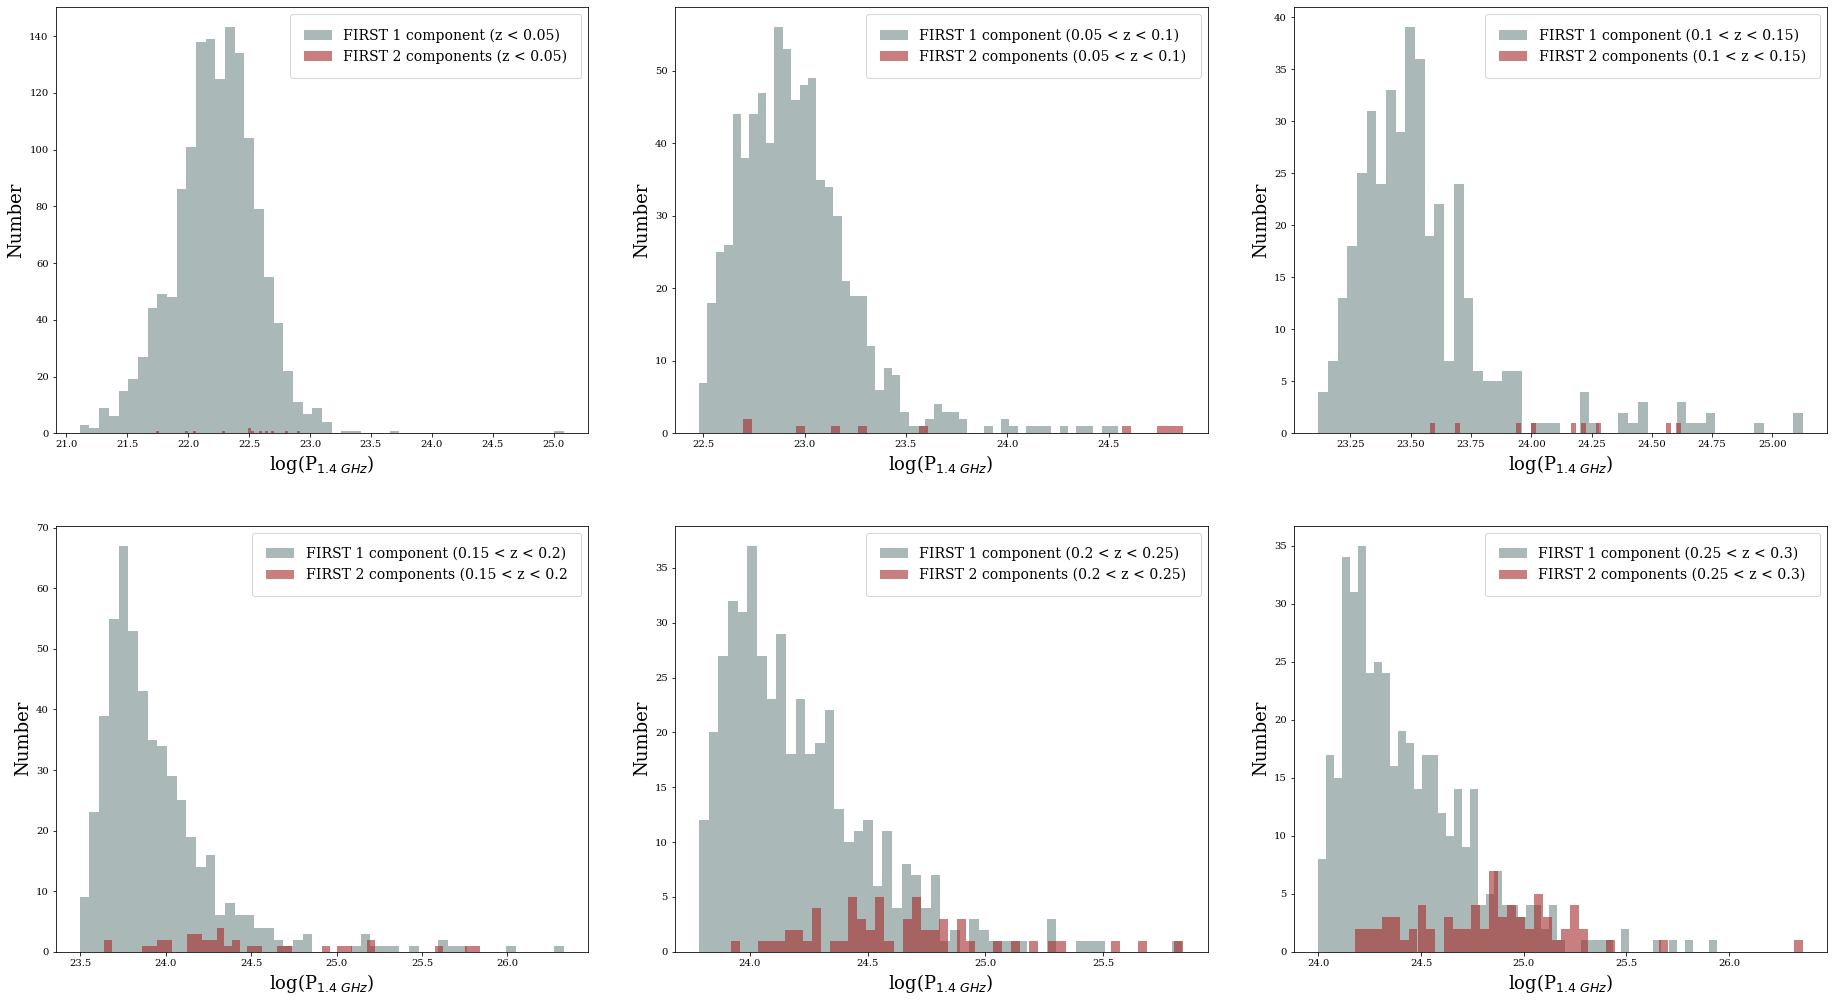

In [31]:
fig = plt.figure(figsize=(20, 16)) 
    
ax1 = fig.add_axes([0.02,0.50,0.37,0.37])
ax2 = fig.add_axes([0.45,0.50,0.37,0.37])
ax3 = fig.add_axes([0.88,0.50,0.37,0.37])
ax4 = fig.add_axes([0.02,0.05,0.37,0.37])
ax5 = fig.add_axes([0.45,0.05,0.37,0.37])
ax6 = fig.add_axes([0.88,0.05,0.37,0.37])
 
ax1.hist(log_P_rad_compact_bin1,bins=50,color='darkslategrey',alpha=0.4,label='FIRST 1 component (z < 0.05)')
ax1.hist(log_P_rad_extended_bin1,bins=50,color='brown',alpha=0.6,label='FIRST 2 components (z < 0.05)')
ax1.set_xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
ax1.set_ylabel(r'Number',fontsize=18)
ax1.legend(borderpad=1,fontsize=14)

ax2.hist(log_P_rad_compact_bin2,bins=50,color='darkslategrey',alpha=0.4,label='FIRST 1 component (0.05 < z < 0.1)')
ax2.hist(log_P_rad_extended_bin2,bins=50,color='brown',alpha=0.6,label='FIRST 2 components (0.05 < z < 0.1)')
ax2.set_xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
ax2.set_ylabel(r'Number',fontsize=18)
ax2.legend(borderpad=1,fontsize=14)

ax3.hist(log_P_rad_compact_bin3,bins=50,color='darkslategrey',alpha=0.4,label='FIRST 1 component (0.1 < z < 0.15)')
ax3.hist(log_P_rad_extended_bin3,bins=50,color='brown',alpha=0.6,label='FIRST 2 components (0.1 < z < 0.15)')
ax3.set_xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
ax3.set_ylabel(r'Number',fontsize=18)
ax3.legend(borderpad=1,fontsize=14)

ax4.hist(log_P_rad_compact_bin4,bins=50,color='darkslategrey',alpha=0.4,label='FIRST 1 component (0.15 < z < 0.2)')
ax4.hist(log_P_rad_extended_bin4,bins=50,color='brown',alpha=0.6,label='FIRST 2 components (0.15 < z < 0.2')
ax4.set_xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
ax4.set_ylabel(r'Number',fontsize=18)
ax4.legend(borderpad=1,fontsize=14)

ax5.hist(log_P_rad_compact_bin5,bins=50,color='darkslategrey',alpha=0.4,label='FIRST 1 component (0.2 < z < 0.25)')
ax5.hist(log_P_rad_extended_bin5,bins=50,color='brown',alpha=0.6,label='FIRST 2 components (0.2 < z < 0.25)')
ax5.set_xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
ax5.set_ylabel(r'Number',fontsize=18)
ax5.legend(borderpad=1,fontsize=14)

ax6.hist(log_P_rad_compact_bin6,bins=50,color='darkslategrey',alpha=0.4,label='FIRST 1 component (0.25 < z < 0.3)')
ax6.hist(log_P_rad_extended_bin6,bins=50,color='brown',alpha=0.6,label='FIRST 2 components (0.25 < z < 0.3)')
ax6.set_xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
ax6.set_ylabel(r'Number',fontsize=18)
ax6.legend(borderpad=1,fontsize=14)

    

In [32]:
select_compact_bin1 = (L==0) & (radio_class==1) & (z<0.05)
select_extended_bin1 = (L==0) & (radio_class!=1) & (z<0.05)
select_compact_bin2 = (L==0) & (radio_class==1) & (z>0.05) & (z<0.1)
select_extended_bin2 = (L==0) & (radio_class!=1) & (z>0.05) & (z<0.1)
select_compact_bin3 = (L==0) & (radio_class==1) & (z>0.1) & (z<0.15)
select_extended_bin3 = (L==0) & (radio_class!=1) & (z>0.1) & (z<0.15)
select_compact_bin4 = (L==0) & (radio_class==1) & (z>0.15) & (z<0.2)
select_extended_bin4 = (L==0) & (radio_class!=1) & (z>0.15) & (z<0.2)
select_compact_bin5 = (L==0) & (radio_class==1) & (z>0.2) & (z<0.25)
select_extended_bin5 = (L==0) & (radio_class!=1) & (z>0.2) & (z<0.25)
select_compact_bin6 = (L==0) & (radio_class==1) & (z>0.25) & (z<0.3)
select_extended_bin6 = (L==0) & (radio_class!=1) & (z>0.25) & (z<0.3)

log_P_rad_compact_bin1 = log_radio_power[select_compact_bin1]
log_P_rad_extended_bin1 = log_radio_power[select_extended_bin1]
log_P_rad_compact_bin2 = log_radio_power[select_compact_bin2]
log_P_rad_extended_bin2 = log_radio_power[select_extended_bin2]
log_P_rad_compact_bin3 = log_radio_power[select_compact_bin3]
log_P_rad_extended_bin3 = log_radio_power[select_extended_bin3]
log_P_rad_compact_bin4 = log_radio_power[select_compact_bin4]
log_P_rad_extended_bin4 = log_radio_power[select_extended_bin4]
log_P_rad_compact_bin5 = log_radio_power[select_compact_bin5]
log_P_rad_extended_bin5 = log_radio_power[select_extended_bin5]
log_P_rad_compact_bin6 = log_radio_power[select_compact_bin6]
log_P_rad_extended_bin6 = log_radio_power[select_extended_bin6]

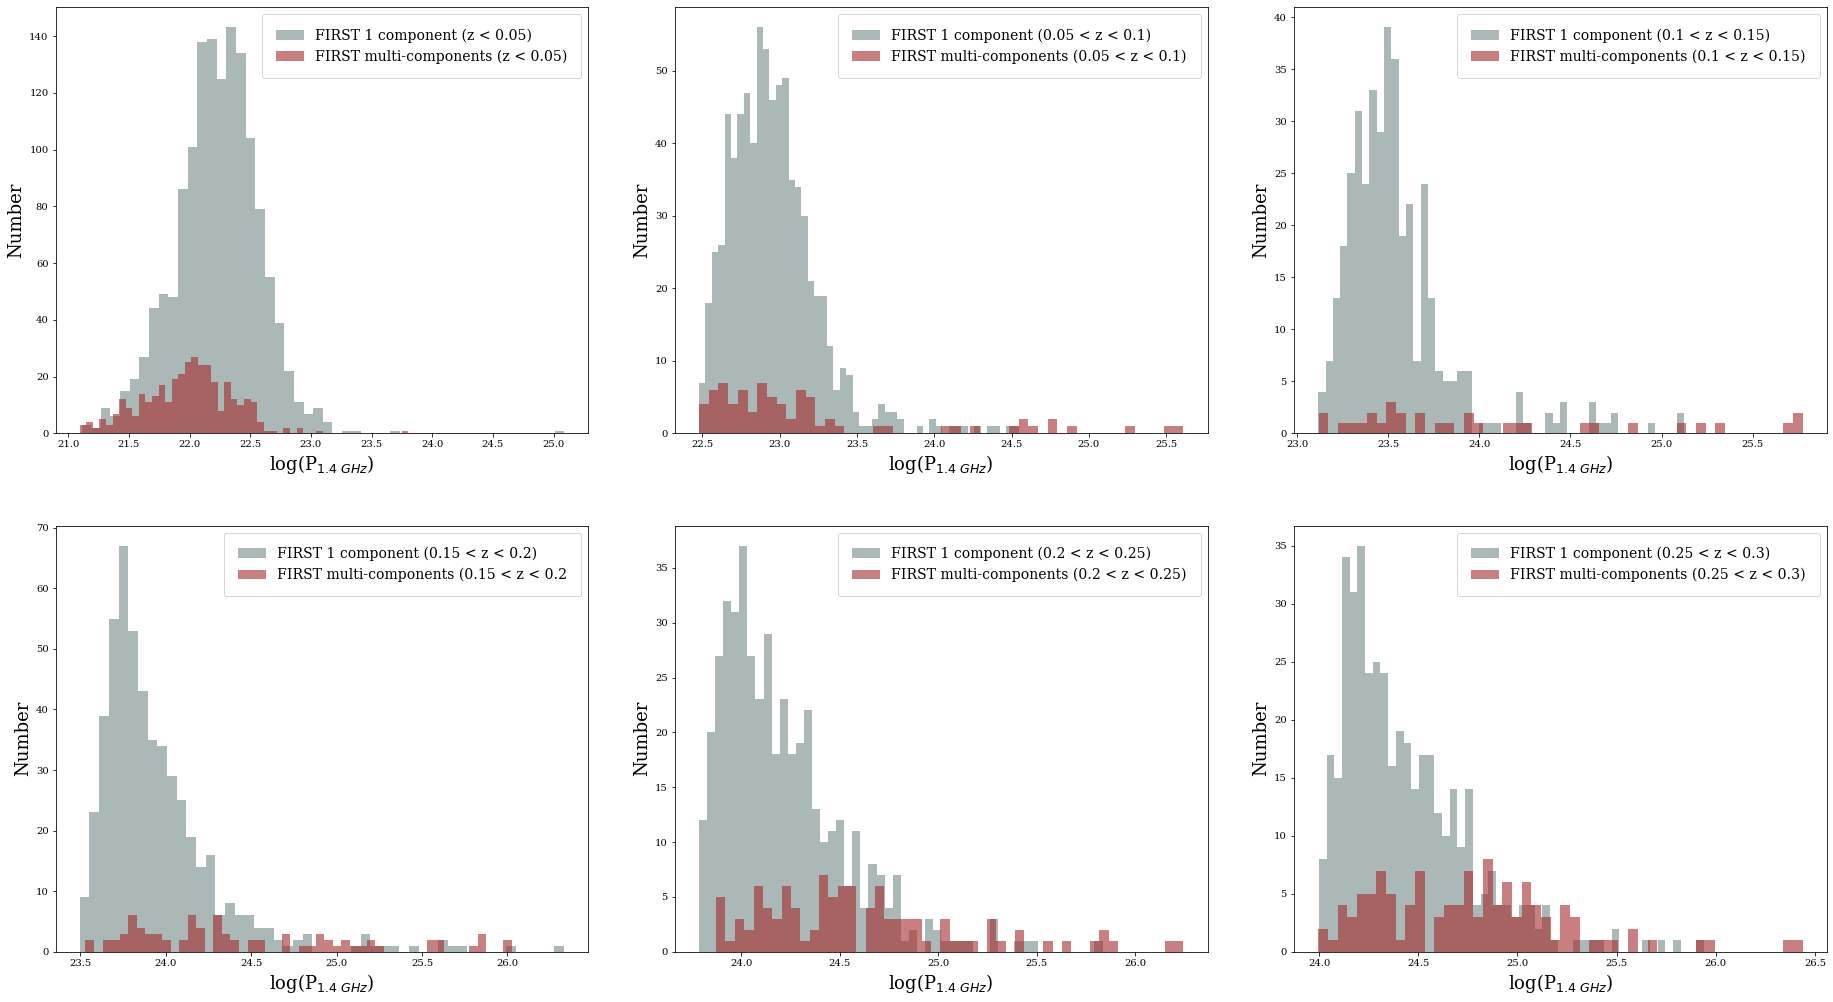

In [33]:
fig = plt.figure(figsize=(20, 16)) 
    
ax1 = fig.add_axes([0.02,0.50,0.37,0.37])
ax2 = fig.add_axes([0.45,0.50,0.37,0.37])
ax3 = fig.add_axes([0.88,0.50,0.37,0.37])
ax4 = fig.add_axes([0.02,0.05,0.37,0.37])
ax5 = fig.add_axes([0.45,0.05,0.37,0.37])
ax6 = fig.add_axes([0.88,0.05,0.37,0.37])
 
ax1.hist(log_P_rad_compact_bin1,bins=50,color='darkslategrey',alpha=0.4,label='FIRST 1 component (z < 0.05)')
ax1.hist(log_P_rad_extended_bin1,bins=50,color='brown',alpha=0.6,label='FIRST multi-components (z < 0.05)')
ax1.set_xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
ax1.set_ylabel(r'Number',fontsize=18)
ax1.legend(borderpad=1,fontsize=14)

ax2.hist(log_P_rad_compact_bin2,bins=50,color='darkslategrey',alpha=0.4,label='FIRST 1 component (0.05 < z < 0.1)')
ax2.hist(log_P_rad_extended_bin2,bins=50,color='brown',alpha=0.6,label='FIRST multi-components (0.05 < z < 0.1)')
ax2.set_xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
ax2.set_ylabel(r'Number',fontsize=18)
ax2.legend(borderpad=1,fontsize=14)

ax3.hist(log_P_rad_compact_bin3,bins=50,color='darkslategrey',alpha=0.4,label='FIRST 1 component (0.1 < z < 0.15)')
ax3.hist(log_P_rad_extended_bin3,bins=50,color='brown',alpha=0.6,label='FIRST multi-components (0.1 < z < 0.15)')
ax3.set_xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
ax3.set_ylabel(r'Number',fontsize=18)
ax3.legend(borderpad=1,fontsize=14)

ax4.hist(log_P_rad_compact_bin4,bins=50,color='darkslategrey',alpha=0.4,label='FIRST 1 component (0.15 < z < 0.2)')
ax4.hist(log_P_rad_extended_bin4,bins=50,color='brown',alpha=0.6,label='FIRST multi-components (0.15 < z < 0.2')
ax4.set_xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
ax4.set_ylabel(r'Number',fontsize=18)
ax4.legend(borderpad=1,fontsize=14)

ax5.hist(log_P_rad_compact_bin5,bins=50,color='darkslategrey',alpha=0.4,label='FIRST 1 component (0.2 < z < 0.25)')
ax5.hist(log_P_rad_extended_bin5,bins=50,color='brown',alpha=0.6,label='FIRST multi-components (0.2 < z < 0.25)')
ax5.set_xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
ax5.set_ylabel(r'Number',fontsize=18)
ax5.legend(borderpad=1,fontsize=14)

ax6.hist(log_P_rad_compact_bin6,bins=50,color='darkslategrey',alpha=0.4,label='FIRST 1 component (0.25 < z < 0.3)')
ax6.hist(log_P_rad_extended_bin6,bins=50,color='brown',alpha=0.6,label='FIRST multi-components (0.25 < z < 0.3)')
ax6.set_xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
ax6.set_ylabel(r'Number',fontsize=18)
ax6.legend(borderpad=1,fontsize=14)

    

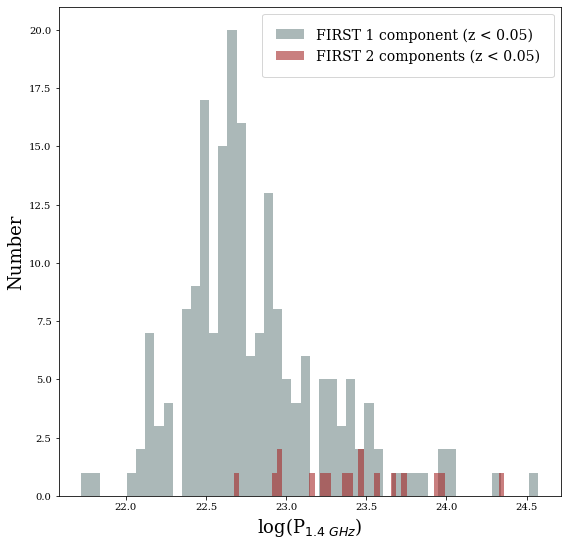

In [7]:
fig = plt.figure(figsize=(9,9))
plt.hist(log_P_rad_compact_bin1,bins=50,color='darkslategrey',alpha=0.4,label='FIRST 1 component (z < 0.05)')
plt.hist(log_P_rad_extended_bin1,bins=50,color='brown',alpha=0.6,label='FIRST 2 components (z < 0.05)')
plt.xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
plt.ylabel(r'Number',fontsize=18)
plt.legend(borderpad=1,fontsize=14)

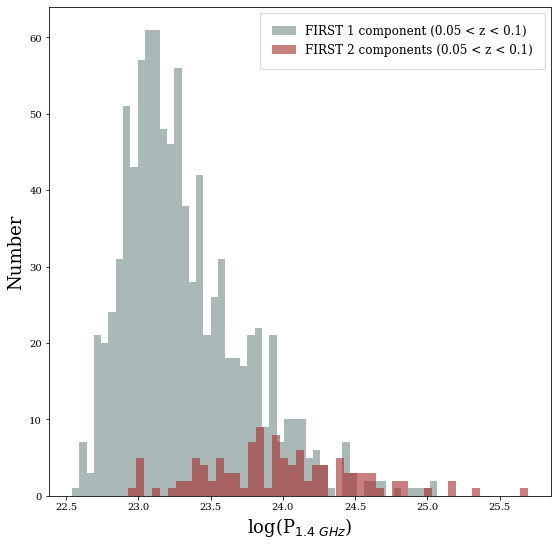

In [7]:
fig = plt.figure(figsize=(9,9))
plt.hist(log_P_rad_compact_intermediate,bins=50,color='darkslategrey',alpha=0.4,label='FIRST 1 component (0.05 < z < 0.1)')
plt.hist(log_P_rad_extended_intermediate,bins=50,color='brown',alpha=0.6,label='FIRST 2 components (0.05 < z < 0.1)')
plt.xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
plt.ylabel(r'Number',fontsize=18)
plt.legend(borderpad=1,fontsize=12)

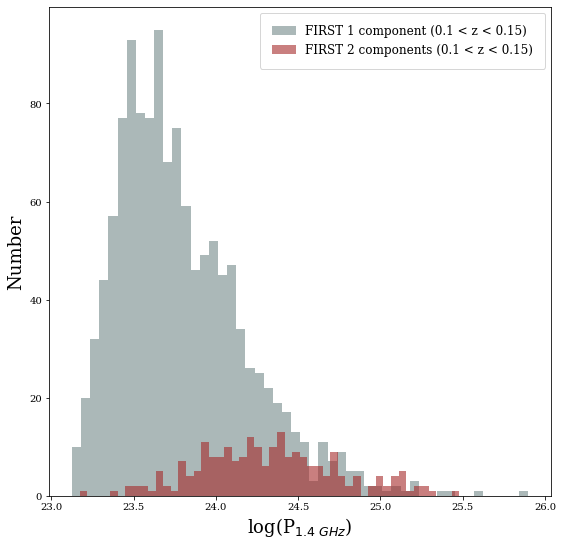

In [8]:
fig = plt.figure(figsize=(9,9))
plt.hist(log_P_rad_compact_far,bins=50,color='darkslategrey',alpha=0.4,label='FIRST 1 component (0.1 < z < 0.15)')
plt.hist(log_P_rad_extended_far,bins=50,color='brown',alpha=0.6,label='FIRST 2 components (0.1 < z < 0.15)')
plt.xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
plt.ylabel(r'Number',fontsize=18)
plt.legend(borderpad=1,fontsize=12)

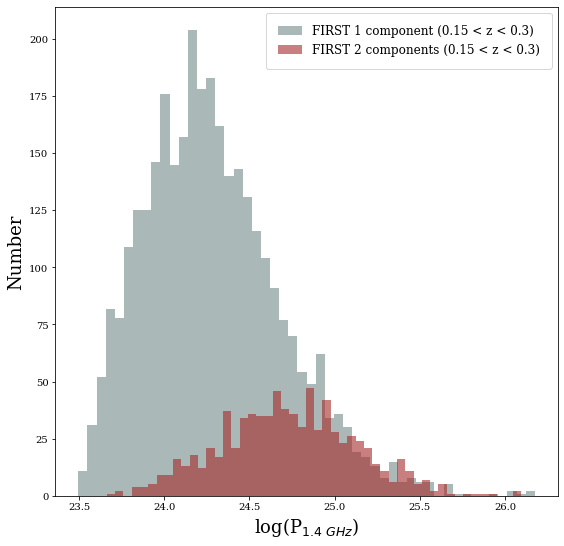

In [10]:
fig = plt.figure(figsize=(9,9))
plt.hist(log_P_rad_compact_farr,bins=50,color='darkslategrey',alpha=0.4,label='FIRST 1 component (0.15 < z < 0.3)')
plt.hist(log_P_rad_extended_farr,bins=50,color='brown',alpha=0.6,label='FIRST 2 components (0.15 < z < 0.3)')
plt.xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
plt.ylabel(r'Number',fontsize=18)
plt.legend(borderpad=1,fontsize=12)

In [8]:
hdu = fits.open('/Volumes/Seagate/LERG/FR0.fits')
data = hdu[1].data
z = data['z']
radio_flux = data['F1_4GHz']
hdu.close()
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
D_L = cosmo.luminosity_distance(z)
dist = D_L.to(u.cm)
log_radio_power_FR0 = np.log10(4*np.pi) + 2*np.log10(dist.value) + np.log10(radio_flux) - 33
print (z.max())

0.05


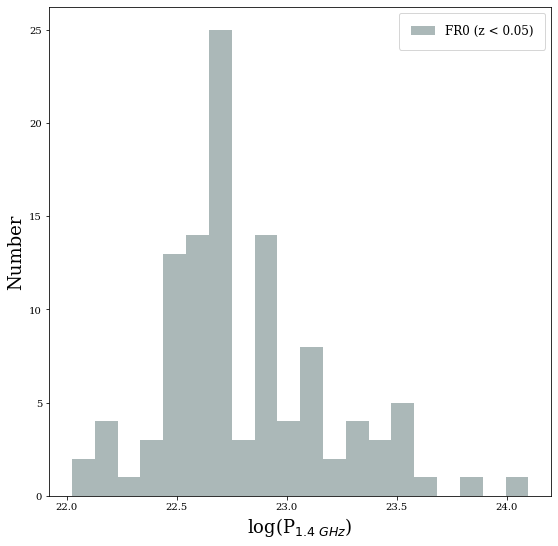

In [9]:
fig = plt.figure(figsize=(9,9))
plt.hist(log_radio_power_FR0,bins=20,color='darkslategrey',alpha=0.4,label='FR0 (z < 0.05)')
plt.xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
plt.ylabel(r'Number',fontsize=18)
plt.legend(borderpad=1,fontsize=12)

In [15]:
hdu = fits.open('/Volumes/Seagate/LERG/FRI.fits')
data = hdu[1].data
z = data['z']
radio_flux = data['F1_4GHz']
hdu.close()
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
D_L = cosmo.luminosity_distance(z)
dist = D_L.to(u.cm)
log_radio_power_FRI = np.log10(4*np.pi) + 2*np.log10(dist.value) + np.log10(radio_flux) - 33
select_extended = (z<0.123)
log_radio_power_FRI_act = log_radio_power_FRI[select_extended]
print (z.max())

0.15


In [16]:
hdu = fits.open('/Volumes/Seagate/LERG/FRII.fits')
data = hdu[1].data
z = data['z']
radio_flux = data['S1_4GHz']
hdu.close()
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
D_L = cosmo.luminosity_distance(z)
dist = D_L.to(u.cm)
log_radio_power_FRII = np.log10(4*np.pi) + 2*np.log10(dist.value) + np.log10(radio_flux) - 33
print (z.max())
select_extended = (z<0.123)
log_radio_power_FRII_act = log_radio_power_FRII[select_extended]

0.148


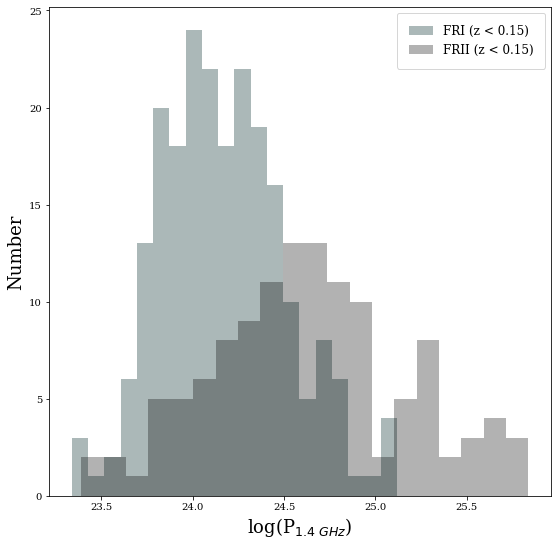

In [17]:
fig = plt.figure(figsize=(9,9))
plt.hist(log_radio_power_FRI,bins=20,color='darkslategrey',alpha=0.4,label='FRI (z < 0.15)')
plt.hist(log_radio_power_FRII,bins=20,color='k',alpha=0.3,label='FRII (z < 0.15)')
plt.xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
plt.ylabel(r'Number',fontsize=18)
plt.legend(borderpad=1,fontsize=12)

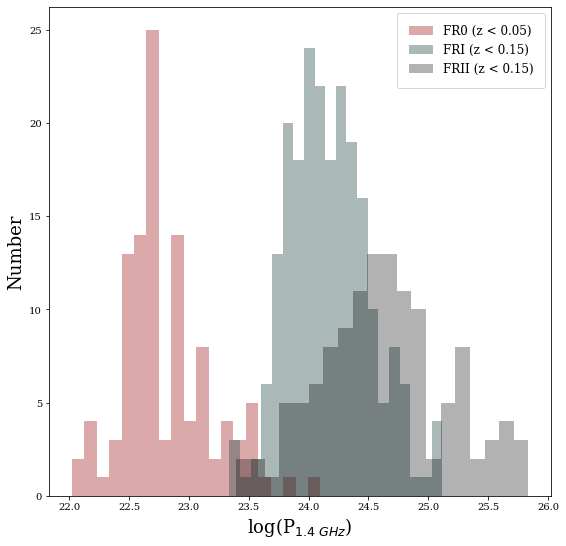

In [18]:
fig = plt.figure(figsize=(9,9))
plt.hist(log_radio_power_FR0,bins=20,color='brown',alpha=0.4,label='FR0 (z < 0.05)')
plt.hist(log_radio_power_FRI,bins=20,color='darkslategrey',alpha=0.4,label='FRI (z < 0.15)')
plt.hist(log_radio_power_FRII,bins=20,color='k',alpha=0.3,label='FRII (z < 0.15)')
plt.xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
plt.ylabel(r'Number',fontsize=18)
plt.legend(borderpad=1,fontsize=12)

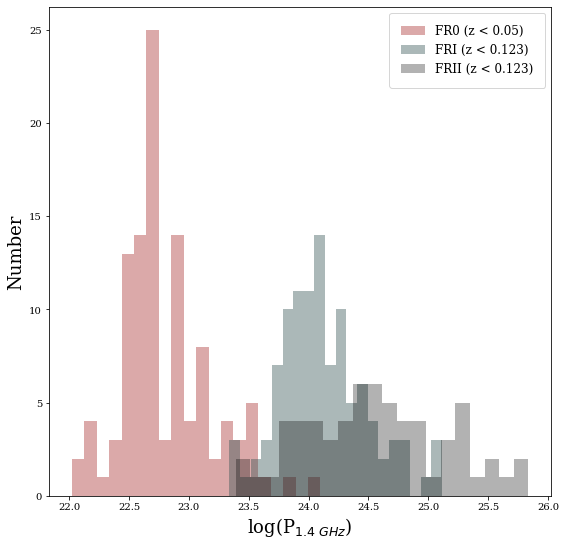

In [19]:
fig = plt.figure(figsize=(9,9))
plt.hist(log_radio_power_FR0,bins=20,color='brown',alpha=0.4,label='FR0 (z < 0.05)')
plt.hist(log_radio_power_FRI_act,bins=20,color='darkslategrey',alpha=0.4,label='FRI (z < 0.123)')
plt.hist(log_radio_power_FRII_act,bins=20,color='k',alpha=0.3,label='FRII (z < 0.123)')
plt.xlabel(r'log(P$_{1.4\ GHz}$)',fontsize=18)
plt.ylabel(r'Number',fontsize=18)
plt.legend(borderpad=1,fontsize=12)

In [25]:
OIII_flux_map = np.full((dim[1],dim[2]) ,np.nan)
OIII_flux_map[x_cor[gas_select],y_cor[gas_select]] = amp_OIII[gas_select]

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


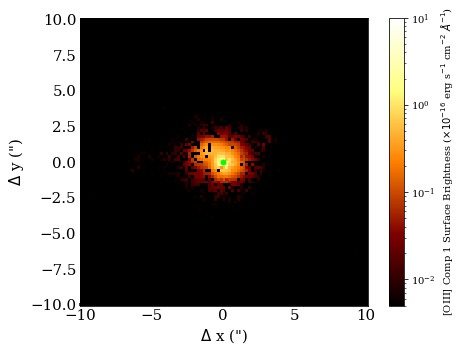

In [180]:
fig = plt.figure()

ax = plt.axes([0,0,1,1])

cmap=cm.afmhot
#cmap = sns.cubehelix_palette(100, light=0.95,dark=0.15, as_cmap=True)
cmap.set_bad('k',1) # Make the NANs white

frame = plt.imshow(OIII_flux_map, origin='lower', cmap=cmap, interpolation='None',vmin=0.005,vmax=10,extent=[xmin,xmax,ymin,ymax], norm=LogNorm())
cbar = plt.colorbar()
plt.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=15)
plt.xlabel(r'$\Delta$ x (")',fontsize=15)
plt.ylabel(r'$\Delta$ y (")',fontsize=15)
plt.plot(0,0,'o',color='Lime',ms=5)

cbar.set_label(r"[OIII] Comp 1 Surface Brightness ($\times 10^{-16}$ erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)",fontsize=10)

In [22]:
OIII_vel_map = np.full((dim[1],dim[2]) ,np.nan)
OIII_vel_map[x_cor[gas_select],y_cor[gas_select]] = vel_OIII[gas_select] - vel_syst[gas_select]

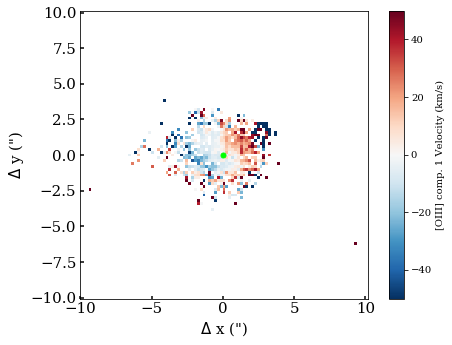

In [46]:
fig = plt.figure()

ax = plt.axes([0,0,1,1])

#OIII_vel_map[OIII_vel_map>50]=np.nan
#scipy_conv = scipy_convolve(OIII_vel_map, kernel, mode='same', method='direct')

#OIII_vel_map[OIII_vel_map<-50]=np.nan

cmap = cm.RdBu_r
cmap.set_bad('w',1) # Make the NANs white
plt.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=15)
plt.xlabel(r'$\Delta$ x (")',fontsize=15)
plt.ylabel(r'$\Delta$ y (")',fontsize=15)
plt.plot(0,0,'o',color='Lime',ms=5)


frame = plt.imshow(OIII_vel_map, origin='lower', cmap=cmap, vmin=-50,vmax=50,extent=[xmin,xmax,ymin,ymax], interpolation='None')
cbar = plt.colorbar()
cbar.set_label(r"[OIII] comp. 1 Velocity (km/s)")

In [44]:
OIII_vel_sigma_map = np.full((dim[1],dim[2]) ,np.nan)
OIII_vel_sigma_map[x_cor[gas_select],y_cor[gas_select]] = vel_sigma_OIII[gas_select]# - vel_syst[gas_select]

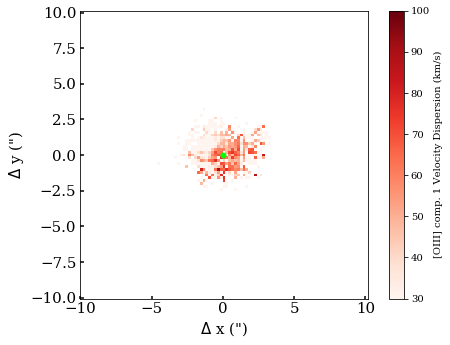

In [166]:
OIII_vel_sigma_map = np.full((dim[1],dim[2]) ,np.nan)
OIII_vel_sigma_map[x_cor[gas_select],y_cor[gas_select]] = vel_sigma_OIII[gas_select] #- vel_syst[gas_select]
fig = plt.figure()

ax = plt.axes([0,0,1,1])


cmap = cm.afmhot

cmap.set_bad('k',1) # Make the NANs white

frame = plt.imshow(OIII_vel_sigma_map, origin='lower', cmap='Reds', vmin=30,vmax=100,extent=[xmin,xmax,ymin,ymax],interpolation='None')
cbar = plt.colorbar()
plt.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=15)
plt.xlabel(r'$\Delta$ x (")',fontsize=15)
plt.ylabel(r'$\Delta$ y (")',fontsize=15)
plt.plot(0,0,'o',color='Lime',ms=5)

cbar.set_label(r"[OIII] comp. 1 Velocity Dispersion (km/s)")

In [152]:
gas_select = (w80/ w80_err > 1) & (amp_OIII>0.005) & (amp_OIII_br>0.005)
dim = [0,101,101]

w80_map = np.full((dim[1],dim[2]) ,np.nan)
w80_map[x_cor[gas_select],y_cor[gas_select]] = w80[gas_select]# - vel_syst[gas_select]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


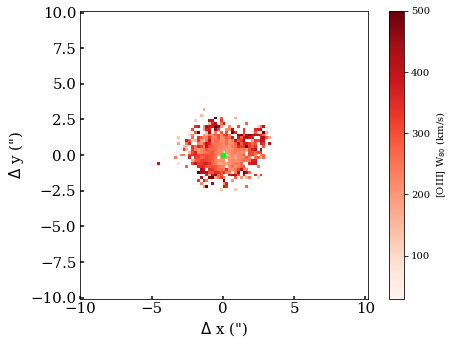

In [154]:
fig = plt.figure()

ax = plt.axes([0,0,1,1])


cmap = cm.afmhot

cmap.set_bad('k',1) # Make the NANs white

frame = plt.imshow(w80_map, origin='lower', cmap='Reds', vmin=30,vmax=500,extent=[xmin,xmax,ymin,ymax],interpolation='None')
cbar = plt.colorbar()
plt.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=15)
plt.xlabel(r'$\Delta$ x (")',fontsize=15)
plt.ylabel(r'$\Delta$ y (")',fontsize=15)
plt.plot(0,0,'o',color='Lime',ms=5)

cbar.set_label(r"[OIII] W$_{80}$ (km/s)")

In [155]:
w80/w80_err

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([  2.6221237,         nan,         nan, ...,   2.5503085,
         3.318208 , 159.29724  ], dtype=float32)

In [156]:
gas_select = (np.abs(v5)/ v5_err > 1) & (amp_OIII>0.005) & (amp_OIII_br>0.005)
dim = [0,101,101]

v5_map = np.full((dim[1],dim[2]) ,np.nan)
v5_map[x_cor[gas_select],y_cor[gas_select]] = v5[gas_select]# - vel_syst[gas_select]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


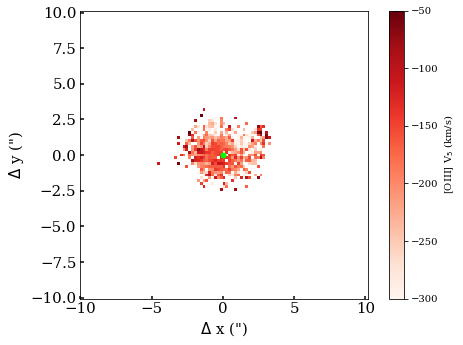

In [157]:
fig = plt.figure()

ax = plt.axes([0,0,1,1])


cmap = cm.afmhot

cmap.set_bad('k',1) # Make the NANs white

frame = plt.imshow(v5_map, origin='lower', cmap='Reds', vmin=-300,vmax=-50,extent=[xmin,xmax,ymin,ymax],interpolation='None')
cbar = plt.colorbar()
plt.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=15)
plt.xlabel(r'$\Delta$ x (")',fontsize=15)
plt.ylabel(r'$\Delta$ y (")',fontsize=15)
plt.plot(0,0,'o',color='Lime',ms=5)

cbar.set_label(r"[OIII] V$_{5}$ (km/s)")

In [ ]:
v